### Testing backend in py , for INEXLINK marketplace  Carbon footprint API

#### These set of  formulas are rooted in initial  literature review for the INEXLINK

In [102]:
class carbon_foot:
    def __init__(self,material, process, EF, EF_transport,EF_fuel,EF_v,EF_rec, mass, distance,fuel,n):
        self.material=material
        self.process= process
        self.EF = EF
        self.EF_transport=EF_transport
        self.EF_fuel=EF_fuel
        self.EF_v=EF_v
        self.EF_rec=EF_rec
        self.mass=mass
        self.distance= distance
        self.fuel= fuel
        self.n= n

    def Material(self):
        return [self.material[i]*self.EF[i]for i in range(self.n)]
    def Process(self):
        return [self.process[j]*self.EF[j] for j in range(self.n)]
        
    def Transport(self):
        return [self.mass[t] *self.distance[t]*self.EF_transport[t] for t in range (self.n)]
        
    def Operations(self):
        return[self.fuel[f]*self.EF_fuel[f] for f in range (self.n)]
        
    def EOL(self):
        return[self.mass[e]*(self.EF_v[e]-self.EF_rec[e]) for e in range(self.n)]


    def carbon(self):
        
        tot_mat= self.Material()
        tot_proc=self.Process()
        tot_trans=self.Transport()  
        tot_op=self.Operations()
        tot_eol=self.EOL()
        
        total = [tot_mat[i] + tot_proc[i] + tot_trans[i] + tot_op[i] - tot_eol[i] for i in range(self.n)]
        return total

       

    
    
    

        

In [103]:
material = [10, 20, 30]
process = [5, 10, 15]
EF = [1, 2, 3]
EF_transport = [0.5, 0.6, 0.7]
EF_fuel = [2, 2.5, 3]
EF_v = [0.8, 0.9, 1.0]
EF_rec = [0.2, 0.3, 0.4]
mass = [100, 200, 300]
distance = [10, 20, 30]
fuel = [50, 60, 70]
n = 3


cf =carbon_foot(material, process, EF, EF_transport, EF_fuel, EF_v, EF_rec, mass, distance, fuel, n)
res=cf.carbon()
print (res)



[555.0, 2490.0, 6465.0]


### We use the randomly generated data set and see the carbon footprint class works 

In [110]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("./mining_assets.csv")
all_result=[]

for _,row in df.iterrows():
    cf=carbon_foot(material,
                   process=[row["process"]],
                   EF=[row["EF"]],
                   EF_transport=[row["EF_transport"]],
                   EF_fuel=[row["EF_fuel"]],
                   EF_v=[row["EF_v"]],
                   EF_rec=[row["EF_rec"]],
                   mass=[row["mass"]],
                   distance=[row["distance"]],
                   fuel=[row["fuel"]],
                   n=1
    )

    result= cf.carbon()
    all_result.append(result[0])

df["carbon footprint"]=all_result

df.to_csv("./cf_asset.csv")

df

,name,material,process,EF,EF_transport,EF_fuel,EF_v,EF_rec,mass,distance,fuel,n,carbon footprint
0,Ventilation Systems,1.42,5796.0,2.20,0.54,1.25,0.28,0.92,3379.8,113.7,383.7,42,2.229289e+05
1,Shovels (Electric or Hydraulic),1.69,3869.3,4.73,1.70,1.59,1.68,0.94,2022.8,320.6,257.5,11,1.119728e+06
2,Ball Mills,3.74,2904.7,2.17,2.47,3.09,1.28,0.31,5810.4,446.6,441.0,78,6.411515e+06
3,Haul Trucks,2.13,2885.6,1.56,1.36,3.36,0.56,0.67,7060.6,350.7,334.7,35,3.373986e+06
4,Loaders (LHDs),1.99,6603.5,3.54,2.05,3.34,1.22,0.10,5094.3,412.0,115.1,45,4.320736e+06
5,Conveyor Belts,2.99,1551.0,4.64,2.22,3.36,1.19,0.27,4913.4,220.5,391.2,91,2.409196e+06
6,Haul Trucks,4.29,4586.1,2.59,2.54,1.23,1.38,0.12,6435.9,228.9,168.9,91,3.745873e+06
7,Haul Trucks,1.88,2402.0,4.90,2.17,2.96,0.68,0.68,2653.9,26.3,170.8,33,1.637851e+05
8,Ventilation Systems,0.51,6320.6,0.13,2.51,3.24,0.57,0.97,8749.5,187.2,76.1,49,4.115714e+06
9,Drill Rigs,3.03,3344.9,1.30,0.47,1.50,1.33,0.32,4069.0,88.7,22.4,12,1.699178e+05


<Axes: xlabel='carbon footprint', ylabel='name'>

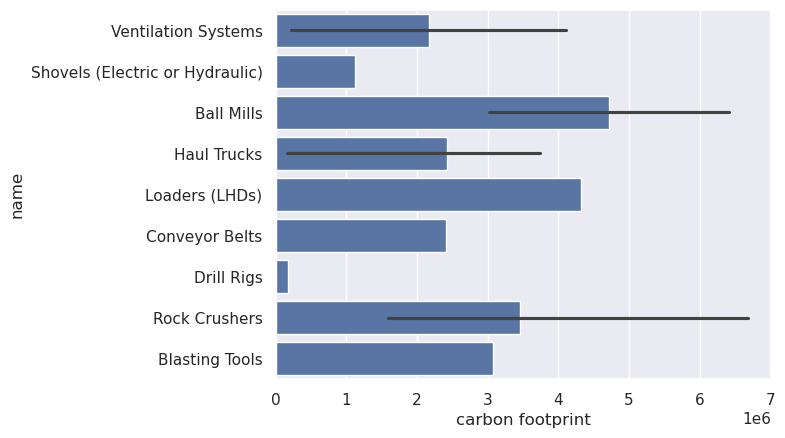

In [116]:
sns.barplot(data=df, x="carbon footprint", y="name")
## check the display function 

### Code Cemetery

In [ ]:
# formula= [
#     "",
#     "",
#     ""]

# import numpy as np





# def manufacturing(material, process , EF, n):
#     # total_man=[]
#     def Material(material , EF, n):
#         total_Emat= []
#         for i in range(0,n):
#            Emat= material[i]*EF[i]
#            total_Emat.append(Emat)
#         return total_Emat
    
#     def Process(process, EF, n):
#         total_proc=[]
#         for j in range(0,n):
#             proc= process[j]*EF[j]
#             total_proc.append(proc)
#         return total_proc
#     total_Emat= Material(material,EF,n)  
#     total_proc= Process(process,EF, n)
#     return  total_Emat+total_proc   

# def Transport(mass, distance, EF_transport,n):
#     total_trans=[]
#     for t in range(0,n):
#         trans=mass[t] *distance[t]*EF_transport[t]
#         total_trans.append(trans)
#     return total_trans


# def Operations(fuel, EF_fuel,n):
#     total_op= []
#     for f in range(0,n):
#         op= fuel[f]*EF_fuel[f]
#         total_op.append(op)
#     return total_op

# def EOL(mass, EF_v, EF_rec,n):
#     total_eol =[]
#     for e in range(0,n):
#         eol= mass[e]*(EF_v[e]-EF_rec[e])
#         total_eol.append(eol)
#     return total_eol    









        

# material = [10, 20, 30]
# # EF = [1, 2, 3]
# # n = 3

# process = [10,20,22]
# EF= [2,2,2]
# n = 3
# EF_v=[100,100,100]
# EF_rec=[30,34,67]


# mass = [100,200,300]

# res= EOL(mass,EF_v,EF_rec,n)
# print(res)
# distance= [1,1,1]
# EF_transport= [1,1,1]

# res= Transport(mass, distance,EF_transport)
# print(res)

# res= manufacturing(material, process, EF,n )
# print(res)

# result_process = Process(process, EF, n)
# print(result_process)

# result = manufacturing(material, EF, n)
# print(result)  # Output: 10*1 + 20*2 + 30*3 = 10 + 40 + 90 = 140





### Used this to generate the data set , only used to illustrate., clearly doesnt represent the ecoinvent or LCAdatabase

In [ ]:
# import pandas as pd
# import random

# # Sample values for mock data
# # materials = ['Iron', 'Copper', 'Gold', 'Silver', 'Bauxite']
# # processes = ['Crushing', 'Grinding', 'Smelting', 'Leaching', 'Concentration']
# # fuels = ['Diesel', 'Gasoline', 'Electricity', 'Natural Gas']
# mining_tools = [
#     "Drill Rigs",
#     "Excavators",
#     "Loaders (LHDs)",
#     "Haul Trucks",
#     "Rock Crushers",
#     "Conveyor Belts",
#     "Ball Mills",
#     "Shovels (Electric or Hydraulic)",
#     "Blasting Tools",
#     "Ventilation Systems"
# ]
# # Create 15 assets
# data = []

# for i in range(15):
#     entry = {
#         "name":random.choice(mining_tools),
#         "material": round(random.uniform(0.1, 5.0), 2),
#         "process":round(random.uniform(100, 10000), 1),
#         "EF": round(random.uniform(0.1, 5.0), 2),
#         "EF_transport": round(random.uniform(0.1, 3.0), 2),
#         "EF_fuel": round(random.uniform(0.1, 4.0), 2),
#         "EF_v": round(random.uniform(0.1, 2.0), 2),
#         "EF_rec": round(random.uniform(0.1, 1.0), 2),
#         "mass": round(random.uniform(100, 10000), 1),
#         "distance": round(random.uniform(10, 500), 1),
#         "fuel": round(random.uniform(10, 500), 1),
#         "n": random.randint(1, 100)
#     }
#     data.append(entry)

# df = pd.DataFrame(data)

# # Save to CSV
# csv_path = "./mining_assets.csv"
# df.to_csv(csv_path, index=False)

# csv_path